<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/transfer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Fine tunning

In [1]:
!nvidia-smi

Thu Jul 25 06:52:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   53C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jul 25 06:52:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   53C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 56.9 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# take the helperfuncion.py from github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-25 06:52:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-25 06:52:44 (90.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [6]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2024-07-24 19:24:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  15.7MB/s    in 11s     

2024-07-24 19:24:17 (14.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
tran_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
# create input data
import tensorflow as tf

IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(tran_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size=32
                                                                           )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[  1.6428571    0.35714287   1.7142857 ]
   [  1.6428571    0.35714287   1.7142857 ]
   [  1.5051019    0.           3.9897962 ]
   ...
   [104.63752     49.499584     8.224299  ]
   [ 87.63774     18.540771     0.663256  ]
   [ 85.520195    10.305908     0.        ]]

  [[  0.           1.0459183    5.214286  ]
   [  0.           1.0663265    5.0816326 ]
   [  0.           1.           6.142857  ]
   ...
   [109.45389     63.38231     15.81101   ]
   [105.46424     45.816242    11.6019945 ]
   [ 94.93848     30.367046     3.5968013 ]]

  [[  0.           1.6428572    9.571428  ]
   [  0.           1.9285717    7.714285  ]
   [  0.           1.7857141    8.        ]
   ...
   [118.02536     82.68851     28.260067  ]
   [ 99.52053     53.57661      8.2909355 ]
   [114.30591     63.163048    22.091621  ]]

  ...

  [[ 40.800934    15.0917635    0.        ]
   [103.35705     74.88257     43.770355  ]
   [133.2142     108.520325    68.90301   ]
   ...
   [121.551025   114.551

# Mô hình 0: Xây dựng mô hình transfer learning với Keras Functional API


In [ ]:
# 1. create model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. freeze base model
base_model.trainable = False

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
#  create output base model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x = base_model(inputs,training=False)
print(f"shape after passing through base model: {x.shape}")

shape after passing through base model: (None, 7, 7, 1280)


In [ ]:
from os import name
# merge output
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after GlobalAveragePooling2D: {x.shape}")

shape after GlobalAveragePooling2D: (None, 1280)


In [ ]:
# activation layer for outpu t
outputs = tf.keras.layers.Dense(10,activation = "softmax",name="output_layer")(x)
print(f"shape after output layer: {outputs.shape}")

shape after output layer: (None, 10)


In [ ]:
model_0 = tf.keras.Model(inputs,outputs)

In [ ]:
# 9. Biên dịch mô hình
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Khớp mô hình (sử dụng ít bước hơn cho validation nên nó nhanh hơn)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Đi qua ít dữ liệu kiểm định hơn nên các epoch nhanh hơn (chúng ta muốn thử nghiệm nhanh hơn!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Theo dõi nhật ký huấn luyện của mô hình cho các trực quan hóa sau này
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])


Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240724-194404
Epoch 1/5
24/24 [==============================] - 20s 290ms/step - loss: 1.8539 - accuracy: 0.4293 - val_loss: 1.2878 - val_accuracy: 0.7549
Epoch 2/5
24/24 [==============================] - 5s 201ms/step - loss: 1.0517 - accuracy: 0.7893 - val_loss: 0.8456 - val_accuracy: 0.8454
Epoch 3/5
24/24 [==============================] - 4s 135ms/step - loss: 0.7471 - accuracy: 0.8413 - val_loss: 0.6773 - val_accuracy: 0.8520
Epoch 4/5
24/24 [==============================] - 4s 141ms/step - loss: 0.5985 - accuracy: 0.8707 - val_loss: 0.5813 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 5s 164ms/step - loss: 0.5071 - accuracy: 0.8987 - val_loss: 0.5454 - val_accuracy: 0.8832


In [ ]:
# view all layers in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

## check layers

In [ ]:
base_model.summary()


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________

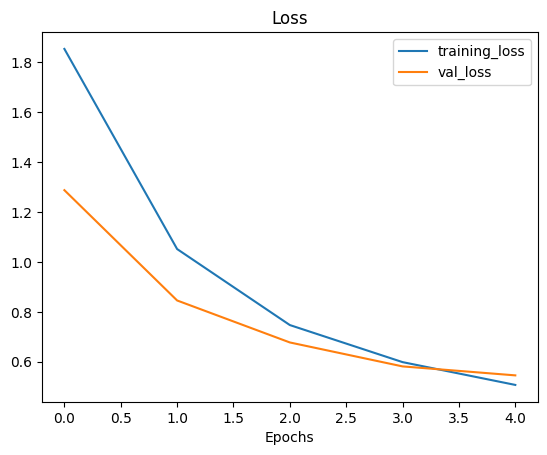

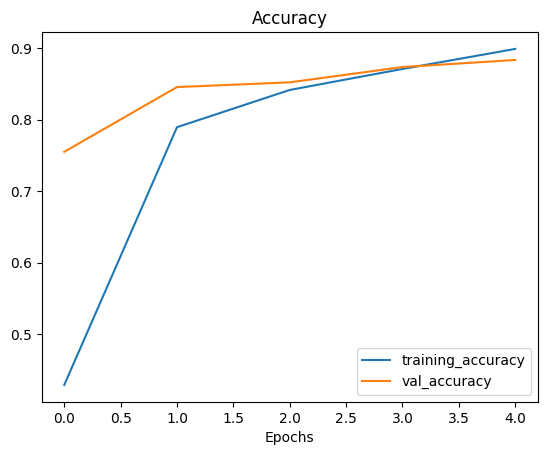

In [ ]:
plot_loss_curves(history_10_percent)

# sample average pooling 2d usage

In [ ]:
# Định nghĩa input tensor shape (có cùng số chiều như đầu ra của efficientnetb0)
input_shape = (1, 4, 4, 3)

# Tạo random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")


Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]



In [ ]:
# Truyền random tensor qua global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Kiểm tra shape của các tensor khác nhau
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# model 1 : train 1% data

In [ ]:
# Download và giải nén dữ liệu
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Tạo các training/test dir
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-07-24 20:14:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  18.5MB/s    in 8.7s    

2024-07-24 20:14:48 (14.7 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32, # mặc định
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)
], name="data_augmentation")

Text(0.5, 1.0, 'Randomly selected grilled_salmon image')

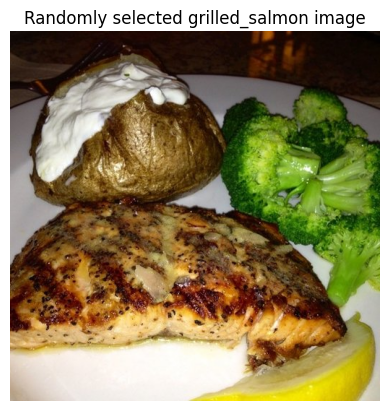

In [ ]:
# check an random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)  # pick a random class
target_dir = "10_food_classes_1_percent/train/" + target_class  # create the target directory
random_image = random.choice(os.listdir(target_dir))  # choose a random image from the target directory
random_image_path = target_dir + "/" + random_image  # create the image path
img = mpimg.imread(random_image_path)  # read in the image with matplotlib
plt.imshow(img)  # plot the image
plt.axis("off")  # turn off the axes
plt.title(f"Randomly selected {target_class} image")  # add a title


Text(0.5, 1.0, 'Augmented image')

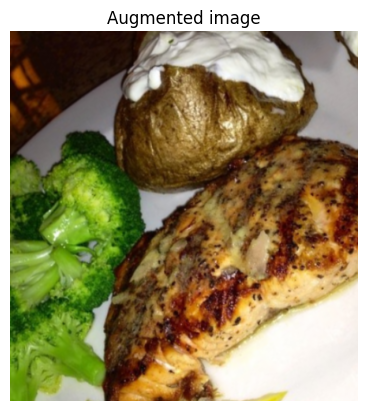

In [ ]:
augmented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.axis("off")
plt.title("Augmented image")

## Mô hình 1: Feature extraction transfer learning trên 1% dữ liệu với data augmentation


In [ ]:
# set input shape and freeze layer
input_shape = (224,224,3)
base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create input layer
inputs1 = tf.keras.layers.Input(shape=input_shape,name="input_layer")

In [ ]:
# adding data augmentation
x = data_augmentation(inputs1)
# add input ionto base model
x = base_model(x,training=False)
# merge output
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# dense output
outputs1 = layers.Dense(10,activation="softmax",name="output_layer")(x)
# create full model 1
model_1 = tf.keras.Model(inputs1,outputs1)

In [ ]:
# Biên dịch mô hình
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # xác thực cho ít bước hơn
                    # Theo dõi nhật ký huấn luyện mô hình
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240724-203025
Epoch 1/5
3/3 [==============================] - 16s 3s/step - loss: 2.3030 - accuracy: 0.1429 - val_loss: 2.2557 - val_accuracy: 0.1513
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0717 - accuracy: 0.3286 - val_loss: 2.1187 - val_accuracy: 0.2253
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.8293 - accuracy: 0.5571 - val_loss: 1.9850 - val_accuracy: 0.3438
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.6074 - accuracy: 0.7286 - val_loss: 1.8950 - val_accuracy: 0.4227
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.4787 - accuracy: 0.7571 - val_loss: 1.7937 - val_accuracy: 0.4819


In [ ]:
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
# Đánh giá trên dữ liệu kiểm tra
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 9s 101ms/step - loss: 1.7800 - accuracy: 0.4952


[1.7799890041351318, 0.4952000081539154]

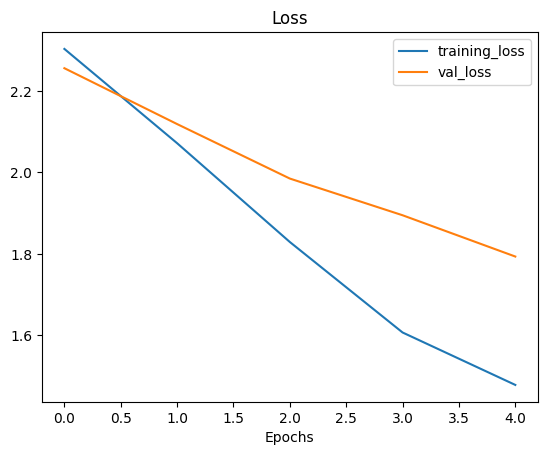

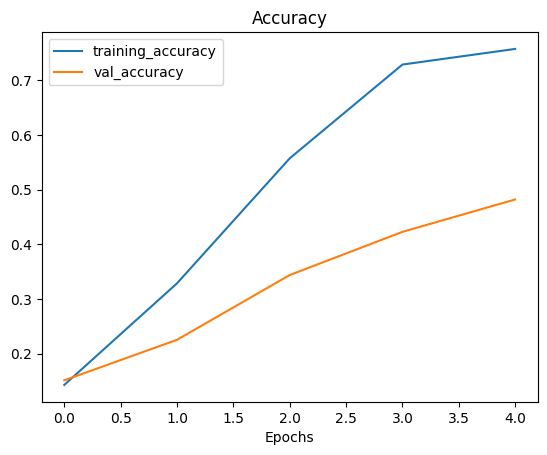

In [ ]:
# Mô hình hoạt động thế nào với layer tăng cường dữ liệu chỉ có 1% dữ liệu
plot_loss_curves(history_1_percent)

# Mô hình 2: Feature extraction transfer learning với 10% dữ liệu và data augmentation


In [ ]:
# Lấy 10% dữ liệu của 10 lớp (không chú thích nếu chưa có  "10_food_classes_10_percent.zip")
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [ ]:
# Thiết lập đầu vào dữ liệu
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Lưu ý: dữ liệu kiểm tra tương tự như trong thử nghiệm trước, chúng ta có thể
# bỏ qua việc tạo điều này nhưng hãy để đây để thực hành.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Tạo mô hình functional với data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Xây dựng layer tăng cường dữ liệu
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # giữ cho ResNet50V2, loại khỏi EfficientNet
], name="data_augmentation")

# Thiết lập shape đầu vào cho mô hình
input_shape = (224, 224, 3)

# Tạo base model đã đóng băng
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Tạo các layer đầu vào và đầu ra
inputs = layers.Input(shape=input_shape, name="input_layer") # tạo layer đầu vào
x = data_augmentation(inputs) # tăng cường ảnh huấn luyện
x = base_model(x, training=False) # truyền các ảnh đã tăng cường vào base model nhưng giữ nó ở chế độ suy luận, nên các batchnorm layer không cập nhật: https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Biên dịch
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # sử dụng thuật tóa tối ưu Adam với learning rate cơ sở
              metrics=["accuracy"])



In [ ]:
# Thiết lập đường dẫn checkpoint
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # lưu ý: nhớ rằng việc lưu trực tiếp vào Colab chỉ là tạm thời

# Tạo ModelCheckpoint callback chỉ để lưu các trọn số của mô hình
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # đặt là False để lưu toàn bộ mô hình
                                                         save_best_only=False, # đặt là True để chỉ lưu những mô hình tốt nhất thay vì một mô hình mỗi epoch
                                                         save_freq="epoch", # lưu mọi epoch
                                                         verbose=1)


In [ ]:
# Khớp mô hình lưu checkpoint mỗi epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # thực hiện ít bước hơn mỗi validation (nhanh hơn)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240724-203543
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9971 - accuracy: 0.3600
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 33s 1s/step - loss: 1.9971 - accuracy: 0.3600 - val_loss: 1.4256 - val_accuracy: 0.7122
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2844 - accuracy: 0.7200
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 723ms/step - loss: 1.2844 - accuracy: 0.7200 - val_loss: 0.9749 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9886 - accuracy: 0.7853
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 747ms/step - loss: 0.9886 - accuracy: 0.7853 - val_loss: 0.7810 - val_accuracy: 0.8273
Epoc

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug


79/79 [==============================] - 7s 67ms/step - loss: 0.6215 - accuracy: 0.8420


[0.6215352416038513, 0.8420000076293945]

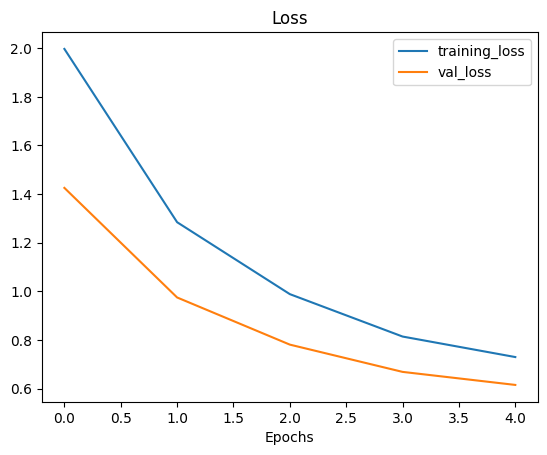

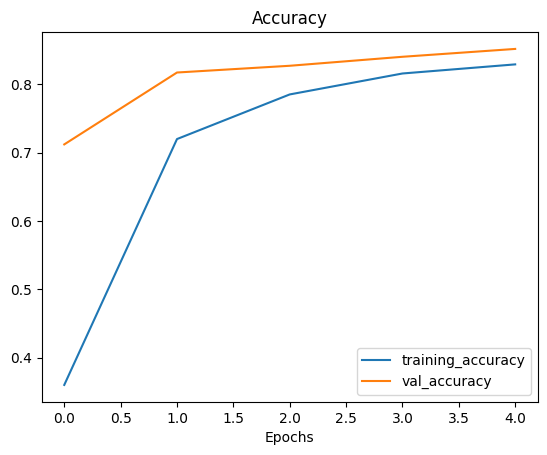

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)
results_10_percent_data_aug == loaded_weights_model_results


79/79 [==============================] - 5s 63ms/step - loss: 0.6215 - accuracy: 0.8420


False

In [ ]:
import numpy as np
# Kiểm tra xem liệu kết quả của mô hình đã load có rất gần với kết quả của mô hình ban đầu không (nên xuất ra True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

# Kiểm tra hiệu số giữa hai kết quả
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[1.78813934e-07 0.00000000e+00]


# Mô hình 3: Tinh chỉnh mô hình hiện có với 10% dữ liệu
